# HW10

In [1]:
import numpy as np
from tensorflow import keras
from keras import models 
from keras import layers
import matplotlib.pyplot as plt

from keras.datasets import imdb
(X, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 3s 0us/step


In [2]:
from keras.preprocessing import sequence

max_words=10000 
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

maxlen = 100 # sequence length
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [28]:
rnn = models.Sequential()
rnn.add(layers.Embedding(max_words, 16))
rnn.add(layers.SimpleRNN(32, activation='relu',return_sequences='True'))
rnn.add(layers.Dense(32))
rnn.add(layers.Dense(1))
rnn.compile(optimizer='nadam',loss='mse')

In [29]:
history=rnn.fit(X_train,y_train,epochs=30,validation_split=0.2,validation_steps=30)

Epoch 1/30
625/625 [==============================] - 13s 21ms/step - loss: 0.2006 - val_loss: 0.1707
Epoch 2/30
625/625 [==============================] - 13s 21ms/step - loss: 0.1557 - val_loss: 0.1708
Epoch 3/30
625/625 [==============================] - 14s 22ms/step - loss: 0.1374 - val_loss: 0.1827
Epoch 4/30
625/625 [==============================] - 14s 23ms/step - loss: 0.1254 - val_loss: 0.1800
Epoch 5/30
625/625 [==============================] - 14s 23ms/step - loss: 0.1188 - val_loss: 0.2032
Epoch 6/30
625/625 [==============================] - 14s 22ms/step - loss: 0.1088 - val_loss: 0.2259
Epoch 7/30
625/625 [==============================] - 14s 23ms/step - loss: 0.1127 - val_loss: 0.1950
Epoch 8/30
625/625 [==============================] - 15s 23ms/step - loss: 0.1015 - val_loss: 0.2014
Epoch 9/30
625/625 [==============================] - 15s 24ms/step - loss: 0.0935 - val_loss: 0.2039
Epoch 10/30
625/625 [==============================] - 15s 24ms/step - loss: 0.124

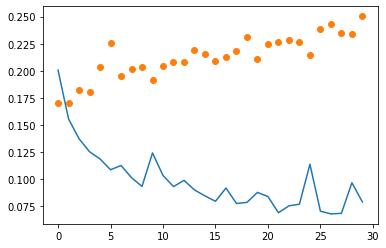

In [30]:
loss=history.history['loss']
val=history.history['val_loss']
plt.plot(loss)
plt.plot(val,'o')